In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#cargar el dataset
df = pd.read_csv("datasets/beisbol.csv")


In [11]:
#Exploración inicial
df.describe()


,Unnamed: 0,bateos,runs
count,30.000000,30.000000,30.000000
mean,14.500000,5523.500000,693.600000
std,8.803408,79.873067,82.479088
min,0.000000,5417.000000,556.000000
25%,7.250000,5448.250000,629.000000
50%,14.500000,5515.500000,705.500000
75%,21.750000,5575.000000,734.000000
max,29.000000,5710.000000,875.000000


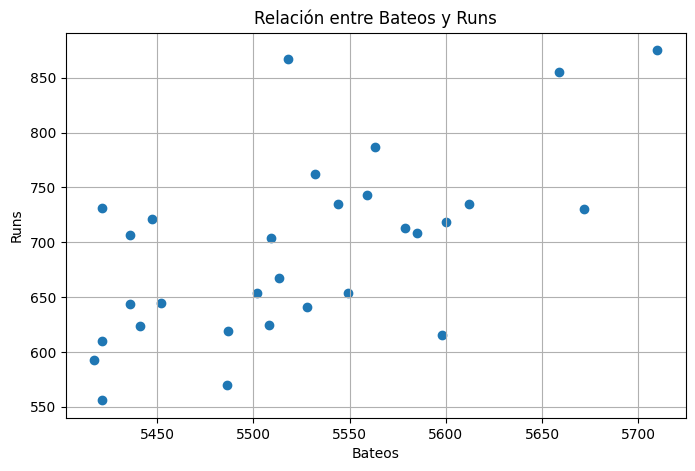

In [6]:
#Gráfica de dispersión de bateos vs runs
plt.figure(figsize=(8,5))
plt.scatter(df["bateos"], df["runs"])
plt.title("Relación entre Bateos y Runs")
plt.xlabel("Bateos")
plt.ylabel("Runs")
plt.grid(True)
plt.show()


In [12]:
#Preparación de los datos
X = df[["bateos"]]   # variable independiente
y = df["runs"]       # variable dependiente

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [13]:
#Entrenamiento del Modelo de regresion lineal 
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
#Prediccion
y_pred = model.predict(X_test)

pd.DataFrame({
    "Real": y_test.values,
    "Predicho": y_pred
})


,Real,Predicho
0,570,675.136046
1,713,738.230451
2,645,652.069274
3,704,690.740039
4,735,714.485245
5,615,751.120706
6,593,628.324068
7,707,641.214323


In [15]:
#Evaluación del modelo
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 51.05511735761212
MSE : 4555.1514946421285
RMSE: 67.4918624327565
R²  : -0.32912234730143264


In [16]:
#optimizacion simple ridge
alphas = [0.01, 0.1, 1, 10, 100]
resultados = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)

    r2_val = r2_score(y_test, pred)
    resultados.append([a, r2_val])

opt_df = pd.DataFrame(resultados, columns=["Alpha", "R2"])
opt_df


,Alpha,R2
0,0.01,-0.329122
1,0.10,-0.329122
2,1.00,-0.329120
3,10.00,-0.329098
4,100.00,-0.328881


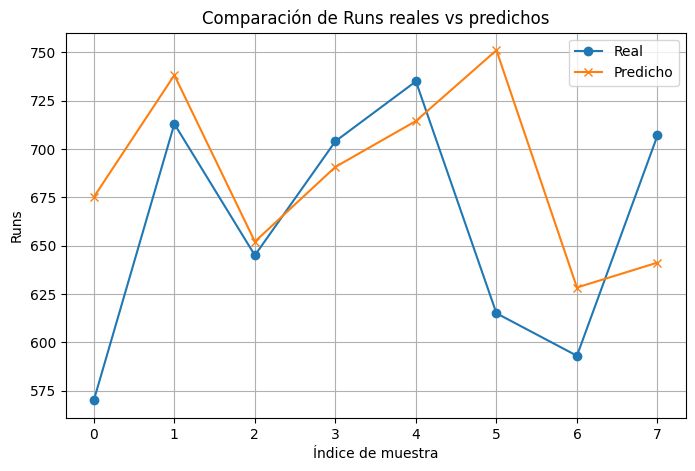

In [17]:
#Grafica real vs predicho
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label="Real", marker="o")
plt.plot(y_pred, label="Predicho", marker="x")
plt.title("Comparación de Runs reales vs predichos")
plt.xlabel("Índice de muestra")
plt.ylabel("Runs")
plt.legend()
plt.grid(True)
plt.show()
